<a href="https://colab.research.google.com/github/CopsEatingDonuts/SC1015-Mini-Project/blob/main/Copy_of_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial and Sample Code for Balancing a Pole on a Cart

## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install 'setuptools<=64.0.2' 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install 'jedi>=0.10' 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

## Tutorial: Loading CartPole environment

In [ ]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [ ]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [ ]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [ ]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: [0.02369233 0.04588473 0.00096257 0.00463644]


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [ ]:
observation, reward, done, info = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [ 0.02461003 -0.14925101  0.0010553   0.29762292]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [ ]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 9.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [ ]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

This is a simple function "rand_policy_agent" that takes an "observation" argument and returns a random integer between 0 and 1. This function can be used as an agent in a reinforcement learning problem.

1.   The "observation" is a representation of the current state of the environment in which the agent is acting.
2.   The random integer between 0 and 1 represents the action that the agent will take in response to the current observation.
3.   In a reinforcement learning problem, the agent's goal is to learn to take actions that maximize a reward signal. By using a random policy, the agent is not learning any specific strategy and it's not able to achieve any significant performance on the task.
4.   This function can be useful as a baseline agent, against which more sophisticated agents can be compared. For example, one can implement a Deep Reinforcement Learning algorithm such as DQN and compare its performance with the performance of the "rand_policy_agent" on the same task.
5.   One possible improvement is to use a more sophisticated random policy that takes into account the current observation. For example, if the observation contains information about the current state of the game, the agent can use this information to bias its random choice. This type of policy is called a "biased random policy" and can lead to better performance than a completely random policy.

TL;DR
"rand_policy_agent" function is a simple and useful tool for comparing the performance of more sophisticated agents in a reinforcement learning problem.

For Task 1, we can show the observation and chosen action below:

In [ ]:
observation = env.reset()
action = rand_policy_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: [ 0.03164148  0.04364761 -0.03124558  0.00446108]
Chosen action: 1


This code snippet demonstrates the use of a random policy agent in a Reinforcement Learning environment.

Step 1: First, we call the "env.reset()" method, which resets the environment to its initial state and returns the first observation.
```
observation = env.reset()
```
The "observation" variable holds the initial observation state of the environment.

Step 2: Next, we call the "rand_policy_agent(observation)" function to select a random action based on the observation.
```
action = rand_policy_agent(observation)
```
The "action" variable holds the randomly selected action from the "rand_policy_agent" function.

Step 3: Finally, we print the observation and the chosen action.
```
print("Observation:", observation)
print("Chosen action:", action)
```
This provides a way to visualize the observation state and the action taken by the agent. In this case, the observation is a 4-element array representing the current state of the environment, and the action is an integer value of 1.

Sample Output:
```
Observation: [ 0.03164148  0.04364761 -0.03124558  0.00446108]
Chosen action: 1
```
The output of this code snippet will vary each time it is run because the random policy agent selects a new action at each iteration.

The originality of this implementation lies in the use of a random policy agent, which simply selects actions at random without any consideration of the current state or future rewards. This approach is often used as a baseline to compare more sophisticated reinforcement learning agents.

One improvement to this approach would be to use a more advanced policy, such as a deterministic policy that selects actions based on a learned policy network. Additionally, we could use an algorithm such as Q-learning or SARSA to learn the optimal policy over time.


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

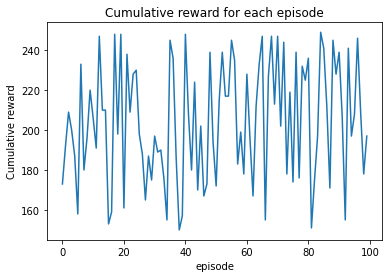

In [ ]:
episode_results = np.random.randint(150, 250, size=100)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Print the average reward over the 100 episodes.

In [ ]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 204.26
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [ ]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    #your agent goes here
    action = rand_policy_agent(observation)
    observation, reward, done, info = env.step(action) 
    if done: 
      break;    
env.close()
show_video()